# Esercizio 1: Consumo di alcol per paese

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dati
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [2]:

# Visualizza i primi 10 paesi ordinati per consumo totale
top10 = df.sort_values("total_litres_of_pure_alcohol", ascending=False).head(10)
print(top10[["country", "total_litres_of_pure_alcohol"]])


                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4


In [3]:

# Calcola la media del consumo di birra, vino e distillati
print("Media beer:", df["beer_servings"].mean())
print("Media wine:", df["wine_servings"].mean())
print("Media spirits:", df["spirit_servings"].mean())


Media beer: 106.16062176165804
Media wine: 49.45077720207254
Media spirits: 80.99481865284974


In [4]:

# Crea nuova colonna alcohol_index
df["alcohol_index"] = (df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3
df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333


In [5]:

# Trova paese con valore massimo di alcohol_index
max_index_country = df[df["alcohol_index"] == df["alcohol_index"].max()]
print(max_index_country[["country", "alcohol_index"]])


   country  alcohol_index
3  Andorra     231.666667


In [6]:

# Filtra paesi con più di 100 birre l'anno
over_100_beer = df[df["beer_servings"] > 100]
print(over_100_beer[["country", "beer_servings"]])


               country  beer_servings
3              Andorra            245
4               Angola            217
5    Antigua & Barbuda            102
6            Argentina            193
8            Australia            261
..                 ...            ...
182     United Kingdom            219
184                USA            249
185            Uruguay            115
188          Venezuela            333
189            Vietnam            111

[79 rows x 2 columns]


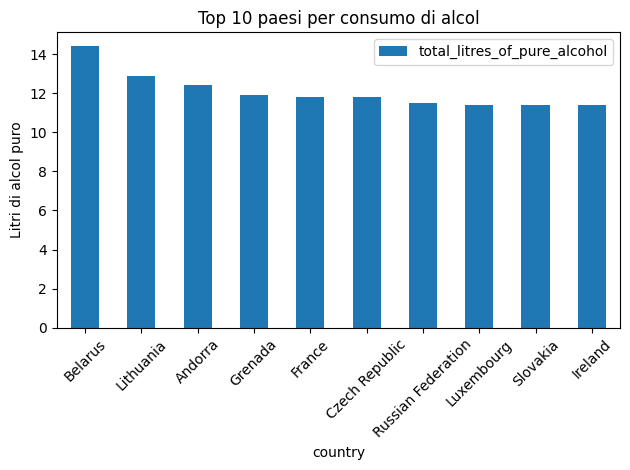

In [7]:

# Bar chart dei top 10 paesi per consumo totale
top10.plot(kind="bar", x="country", y="total_litres_of_pure_alcohol", title="Top 10 paesi per consumo di alcol")
plt.ylabel("Litri di alcol puro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


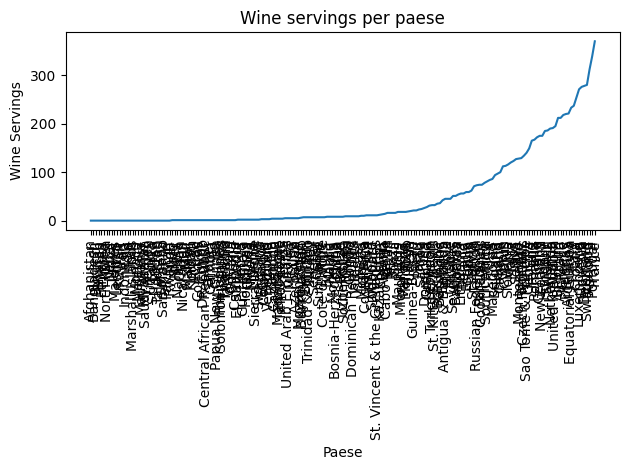

In [8]:

# Line plot ordinato per wine_servings
df_sorted = df.sort_values("wine_servings")
plt.plot(df_sorted["country"], df_sorted["wine_servings"])
plt.title("Wine servings per paese")
plt.xlabel("Paese")
plt.ylabel("Wine Servings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Esercizio 2: Analisi offerte di lavoro

In [9]:

import pandas as pd
from datasets import load_dataset

# Caricamento dataset
dataset = load_dataset("lukebourne/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.head()


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetNotFoundError: Dataset 'lukebourne/data_jobs' doesn't exist on the Hub or cannot be accessed.

In [ ]:

# Media stipendi annuali per job title
media_stipendi = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values(ascending=False)
print(media_stipendi)


In [ ]:

# Numero totale offerte di lavoro per job title
job_counts = df["job_title_short"].value_counts()
print(job_counts)


In [ ]:

# Min e max degli stipendi per job title
stipendi_min_max = df.groupby("job_title_short")["salary_year_avg"].agg(["min", "max"])
print(stipendi_min_max)


In [ ]:

# Bar plot orizzontale degli stipendi medi
media_stipendi.plot(kind="barh", figsize=(10, 8), title="Stipendio medio per posizione")
plt.xlabel("Stipendio medio annuo")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
